# Initialization

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

# Data Analysis

Read, format and split into training and testing data

In [79]:
data = pd.read_csv("W23 - heart_modified.csv")
display(data)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,65,M,ASY,114,318,ST,140,N,4.4,Down,1
1,62,M,ASY,128,223,ST,119,Y,2.0,Down,1
2,56,M,ASY,140,298,Normal,122,Y,4.2,Flat,1
3,59,M,ASY,180,285,ST,120,Y,1.5,Flat,1
4,71,M,ASY,185,0,Normal,98,Y,0.0,Up,1
...,...,...,...,...,...,...,...,...,...,...,...
913,60,F,NAP,108,267,LVH,167,N,0.0,Up,0
914,57,M,ASY,120,182,Normal,150,N,0.0,Flat,1
915,71,M,ASY,140,187,LVH,144,Y,4.0,Up,1
916,42,M,ATA,120,200,Normal,160,Y,1.0,Flat,0


In [80]:
headers = pd.read_csv("W23 - heart_modified.csv").columns.to_list()
data = pd.read_csv("W23 - heart_modified.csv")

# Encode string parameters as integers
data['Sex'] = data['Sex'].replace("M", 0)
data['Sex'] = data['Sex'].replace("F", 1)
data['ExerciseAngina'] = data['ExerciseAngina'].replace("N", 0)
data['ExerciseAngina'] = data['ExerciseAngina'].replace("Y", 1)
data['ChestPainType'] = data['ChestPainType'].replace("ASY", 0)
data['ChestPainType'] = data['ChestPainType'].replace("NAP", 1)
data['ChestPainType'] = data['ChestPainType'].replace("TA", 2)
data['ChestPainType'] = data['ChestPainType'].replace("ATA", 3)
data['RestingECG'] = data['RestingECG'].replace("Normal", 0)
data['RestingECG'] = data['RestingECG'].replace("LVH", 1)
data['RestingECG'] = data['RestingECG'].replace("ST", 2)
data['ST_Slope'] = data['ST_Slope'].replace("Flat", 0)
data['ST_Slope'] = data['ST_Slope'].replace("Down", 1)
data['ST_Slope'] = data['ST_Slope'].replace("Up", 2)
data_np = data.to_numpy()

X, y = data_np[:, 0:len(headers)-2], data_np[:, len(headers)-1]

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)


Plot class distribution for training and testing data

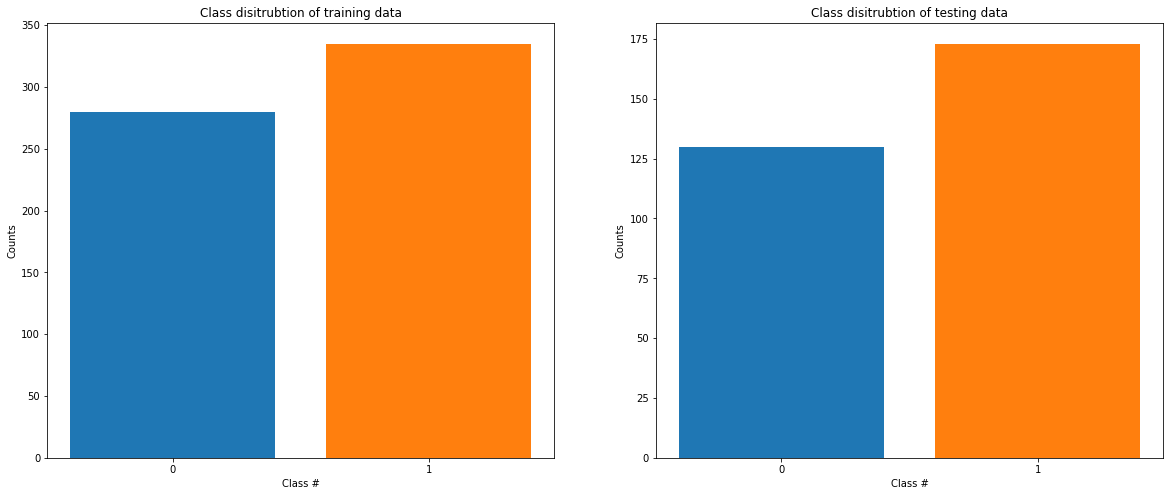

In [81]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

labels, counts = np.unique(y_train, return_counts=True)
# plt.bar(labels, counts, align='center')
ax1.bar(labels, counts, align='center', color=plt.cm.get_cmap('tab10').colors)
ax1.set_xticks(labels)
ax1.set_xticklabels([0, 1])
ax1.set_title("Class disitrubtion of training data")
ax1.set_xlabel("Class #")
ax1.set_ylabel("Counts")

labels, counts = np.unique(y_test, return_counts=True)
# plt.bar(labels, counts, align='center')
ax2.bar(labels, counts, align='center', color=plt.cm.get_cmap('tab10').colors)
ax2.set_xticks(labels)
ax2.set_xticklabels([0, 1])
ax2.set_title("Class disitrubtion of testing data")
ax2.set_xlabel("Class #")
ax2.set_ylabel("Counts")

plt.show()


Heatmap for correlation between continuous variables and y variable

<AxesSubplot:>

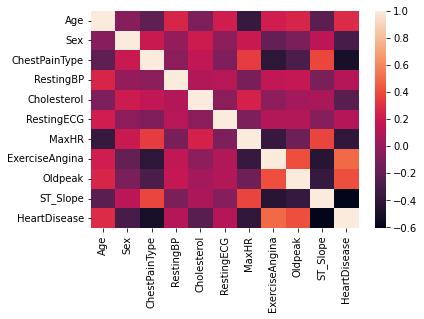

In [82]:
import seaborn as sns

# Create heatmap
sns.heatmap(data.corr())

# Model

In [89]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = np.sum(y_test == y_pred) / len(y_pred)
score = model.score(X_test, y_test)
print(score)
print(accuracy)

0.8250825082508251
0.8250825082508251
